In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
        
print('Setup complete')

Setup complete


#  **Healthcare Employee Attrition Data**
#  **Part 1 - EDA**

 # 1. Reading and cleaning the data
 - We first reading the csv file (indexed to EmployeeID) and check for the types of columns present.
 - Ensure that there are no null values.

In [2]:
main_df = pd.read_csv('watson_healthcare_modified.csv', index_col = 'EmployeeID')
display(main_df.head(5))
cols = main_df.columns
display(cols)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
main_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

- Next lets check for the uniqueness in values for each column.

In [4]:
for n in cols:
    print('Unique values of', n)
    display(pd.unique(main_df[n]))
    print()

Unique values of Age


array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)


Unique values of Attrition


array(['No', 'Yes'], dtype=object)


Unique values of BusinessTravel


array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)


Unique values of DailyRate


array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
        142, 1127, 1031, 1189, 1354, 1467,  922,  394, 1312,  750,  441,
        684,  249,  841,  147,  528,  594,  470,  957,  542,  802, 1355,
       1150, 1329,  959, 1033, 1316,  364,  438,  689,  201, 1427,  857,
        933, 1181, 1395,  662, 1436,  194,  967, 14


Unique values of Department


array(['Cardiology', 'Maternity', 'Neurology'], dtype=object)


Unique values of DistanceFromHome


array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)


Unique values of Education


array([2, 1, 4, 3, 5], dtype=int64)


Unique values of EducationField


array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)


Unique values of EmployeeCount


array([1], dtype=int64)


Unique values of EnvironmentSatisfaction


array([2, 3, 4, 1], dtype=int64)


Unique values of Gender


array(['Female', 'Male'], dtype=object)


Unique values of HourlyRate


array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)


Unique values of JobInvolvement


array([3, 2, 4, 1], dtype=int64)


Unique values of JobLevel


array([2, 1, 3, 4, 5], dtype=int64)


Unique values of JobRole


array(['Nurse', 'Other', 'Therapist', 'Administrative', 'Admin'],
      dtype=object)


Unique values of JobSatisfaction


array([4, 2, 3, 1], dtype=int64)


Unique values of MaritalStatus


array(['Single', 'Married', 'Divorced'], dtype=object)


Unique values of MonthlyIncome


array([ 5993,  5130,  2090, ..., 12742,  9071,  2836], dtype=int64)


Unique values of MonthlyRate


array([19479, 24907,  2396, ..., 11563, 11757, 26997], dtype=int64)


Unique values of NumCompaniesWorked


array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)


Unique values of Over18


array(['Y'], dtype=object)


Unique values of OverTime


array(['Yes', 'No'], dtype=object)


Unique values of PercentSalaryHike


array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)


Unique values of PerformanceRating


array([3, 4], dtype=int64)


Unique values of RelationshipSatisfaction


array([1, 4, 2, 3], dtype=int64)


Unique values of StandardHours


array([80], dtype=int64)


Unique values of Shift


array([0, 1, 3, 2], dtype=int64)


Unique values of TotalWorkingYears


array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)


Unique values of TrainingTimesLastYear


array([0, 3, 2, 5, 1, 4, 6], dtype=int64)


Unique values of WorkLifeBalance


array([1, 3, 2, 4], dtype=int64)


Unique values of YearsAtCompany


array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)


Unique values of YearsInCurrentRole


array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)


Unique values of YearsSinceLastPromotion


array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)


Unique values of YearsWithCurrManager


array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

As we can see, there are some columns which lack clarification or are not meaningful from the source. These columns will be dropped.
- EmployeeCount is always 1
- StandardHours is always 80
- Over18 is always Yes
- Daily, hourly, monthly rate (no meaningful given)
- JobRoles have both Administrative and Admin, which both should refer to the same category, we will rename this value.

In [5]:
main_df.drop(['DailyRate', 'Over18','StandardHours', 'EmployeeCount', 'DailyRate','MonthlyRate', 'HourlyRate'], axis = 1, inplace = True)
main_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1313919,41,No,Travel_Rarely,Cardiology,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1200302,49,No,Travel_Frequently,Maternity,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
1060315,37,Yes,Travel_Rarely,Maternity,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
1272912,33,No,Travel_Frequently,Maternity,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
1414939,27,No,Travel_Rarely,Maternity,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [6]:
cond = (main_df['JobRole']== 'Administrative')
display(cond.sum())
main_df.loc[cond, 'JobRole'] = 'Admin'
display(cond.sum())

115

115

# 2. Identifying patterns within Background History of Employees
- We will see if there are any correlations between the employees' background history and their attrition.

,Age,Education,DistanceFromHome,NumCompaniesWorked,YearsAtCompany
count,1676.00,1676.00,1676.00,1676.00,1676.00
mean,36.87,2.91,9.22,2.66,7.03
std,9.13,1.03,8.16,2.48,6.10
min,18.00,1.00,1.00,0.00,0.00
25%,30.00,2.00,2.00,1.00,3.00
50%,36.00,3.00,7.00,2.00,5.00
75%,43.00,4.00,14.00,4.00,10.00
max,60.00,5.00,29.00,9.00,40.00


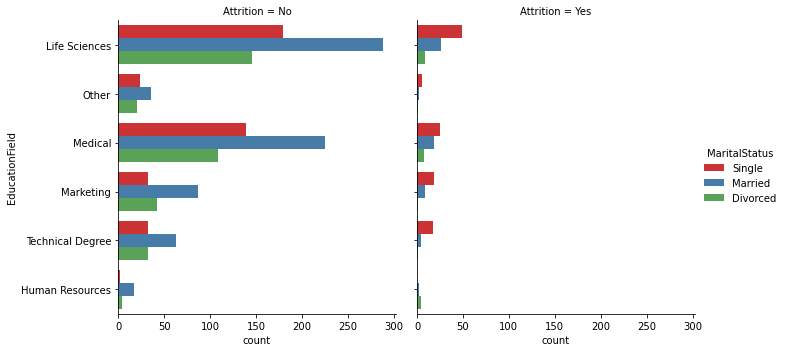

In [7]:
bg_history_df = main_df[['Attrition','Age', 'EducationField', 'Education', 'DistanceFromHome', 'MaritalStatus', 'Gender', 'NumCompaniesWorked', 'YearsAtCompany']]
display(round(bg_history_df.describe(), 2))

sns.catplot(data = bg_history_df, y = 'EducationField', hue = 'MaritalStatus', col = 'Attrition', kind = 'count', palette = 'Set1')

- **Across all education fields, we see that healthcare employees that are single have the highest count of attrition.**
- **Healthcare employees that are married tend to have a lower count of attrition**

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

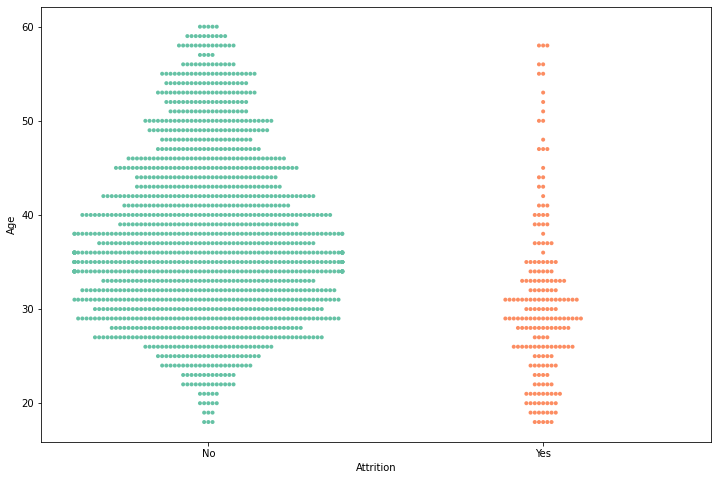

In [8]:
plt.figure(figsize=(12,8))
#sns.kdeplot(data = bg_history_df, x = 'Age', hue = 'Attrition')
sns.swarmplot(data = bg_history_df, x = 'Attrition', y = 'Age', size = 4, palette = 'Set2')

- **We notice that employees aged between 18 to 35 have the highest density of attrition.**

<AxesSubplot:xlabel='MaritalStatus', ylabel='DistanceFromHome'>


Means for Violinplot below
Single Mean (No) 8.6495
Single Mean (Yes) 10.614

Married Mean (No) 9.088
Married Mean (Yes) 13.3607

Divorced Mean (No) 8.8329
Divorced Mean (Yes) 11.5417



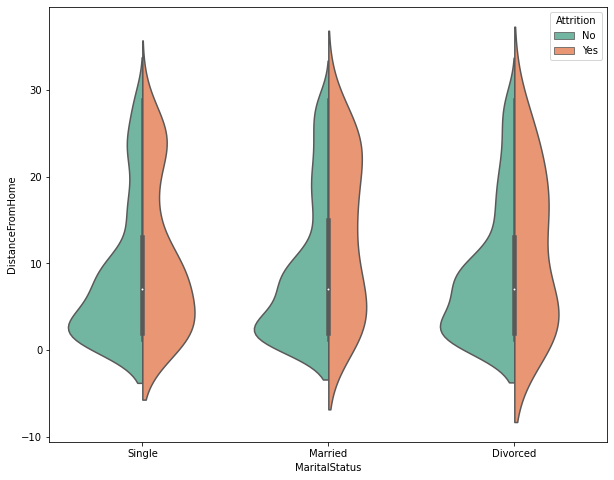

In [9]:
plt.figure(figsize=(10,8))
display(sns.violinplot(data = bg_history_df, y = 'DistanceFromHome', 
                       x = 'MaritalStatus' , hue = 'Attrition', split = True,
                      palette = 'Set2'))

print('\nMeans for Violinplot below')
conditions = ['Single', 'Married', 'Divorced']
for n in conditions:
    cond = (bg_history_df['MaritalStatus'] == n) & (bg_history_df['Attrition'] == 'No')
    print(n, 'Mean (No)',round((bg_history_df[cond]).DistanceFromHome.mean(), 4))
    cond = (bg_history_df['MaritalStatus'] == n) & (bg_history_df['Attrition'] == 'Yes')
    print(n, 'Mean (Yes)',round((bg_history_df[cond]).DistanceFromHome.mean(), 4))
    print()

- **Across all marital status, we see that there is a higher mean for distance from home that results in attrition, this is observed across all marital status and especially higher for married employees.**
- **Employees that have a short distance from home (below 10) tend to have a low attrition rate**

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Count'>

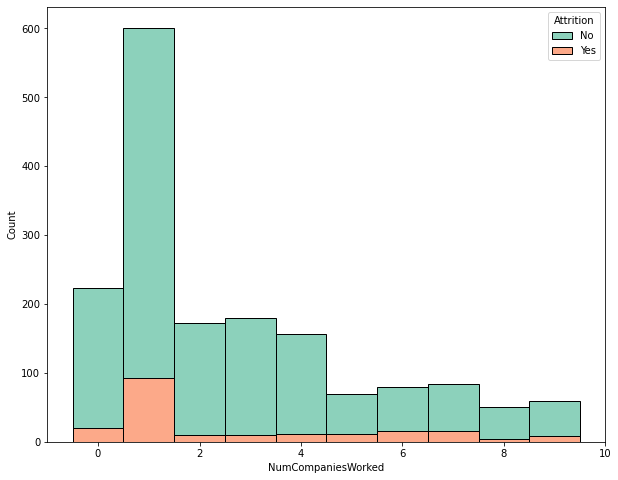

In [10]:
plt.figure(figsize=(10,8))
sns.histplot(data = bg_history_df, x = 'NumCompaniesWorked', hue = 'Attrition', 
             discrete = True, multiple = 'stack', palette = 'Set2')
#sns.catplot(data = bg_history_df, x = 'NumCompaniesWorked', kind = 'count' , hue = 'Attrition', col = 'MaritalStatus')

- **Here we see little difference between the number of companies worked against attrition rate.**
- **We note that most healthcare employees have only worked 1 company prior to their current work.**

In [11]:
#sns.pairplot(data = bg_history_df,  y_vars = ['MaritalStatus','EducationField', 'Gender'], x_vars = ['DistanceFromHome', 'NumCompaniesWorked', 'Education'], hue = 'Attrition',kind = 'hist')


# 2. Identifying Work Engagement based on Department and Job Role
We identify employees' level of engagement based on
- JobInvolvement
- JobSatisfaction
- EnvironmentSatisfaction
- RelationshipSatisfaction
- WorkLifeBalance
- PerformanceRating
- TrainingTimesLastYear
- JobLevel
- YearsSinceLastPromotion
- YearsWithCurrManager


In [12]:
left = main_df[['Department', 'JobRole', 'Attrition']] #these are the indexes 
right = main_df[['JobLevel','JobInvolvement','JobSatisfaction',
          'EnvironmentSatisfaction','RelationshipSatisfaction', 
          'WorkLifeBalance','PerformanceRating']].apply(lambda x: (x*2)) #convert rating of 5 to percentage
wcond_df = left.join(right)
round(wcond_df.describe(), 2)

#'TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager',


,JobLevel,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,PerformanceRating
count,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00,1676.00
mean,4.13,5.45,5.48,5.43,5.44,5.53,6.30
std,2.23,1.43,2.21,2.20,2.16,1.40,0.72
min,2.00,2.00,2.00,2.00,2.00,2.00,6.00
25%,2.00,4.00,4.00,4.00,4.00,4.00,6.00
50%,4.00,6.00,6.00,6.00,6.00,6.00,6.00
75%,6.00,6.00,8.00,8.00,8.00,6.00,6.00
max,10.00,8.00,8.00,8.00,8.00,8.00,8.00


<AxesSubplot:title={'center':'Heatmap of JobRole and Department against Ratings (scale of 1 to 10)'}, ylabel='JobRole-Department'>

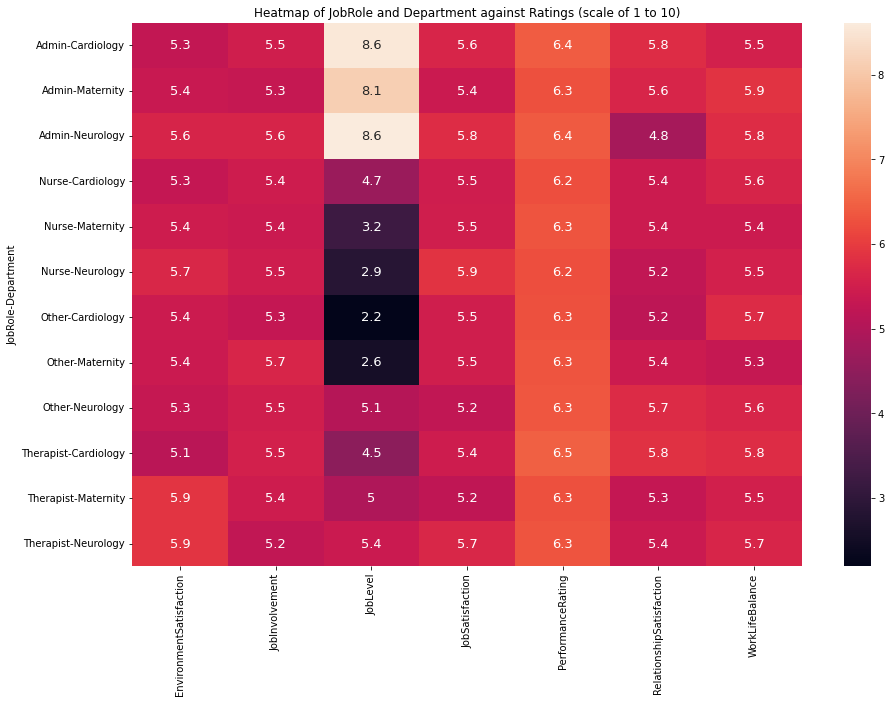

In [13]:
#df = main_df[['Department', 'JobRole', 'JobSatisfaction']]
#df.set_index('Department', inplace= True)
piv = pd.pivot_table(data = wcond_df, index = ['JobRole', 'Department'])
plt.figure(figsize=(15,10))
plt.title('Heatmap of JobRole and Department against Ratings (scale of 1 to 10)')
sns.heatmap(piv, annot=True, annot_kws={'size': 13})

- **We can see that there is little difference in means of 'Environment, Relationship and Job Satisfaction' across all departments and roles**
- **JobRoles of Nurses and Others are at a lower JobLevel than others.**

<AxesSubplot:title={'center':'Heatmap of Attrition based on Ratings'}, ylabel='Attrition'>

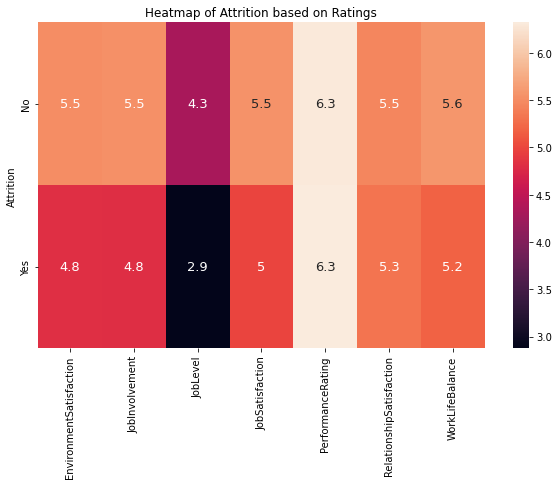

In [14]:
piv = pd.pivot_table(data = wcond_df, index = ['Attrition'])
plt.figure(figsize=(10,6))
plt.title('Heatmap of Attrition based on Ratings')
display(sns.heatmap(piv, annot=True, annot_kws={'size': 13} ))

- **Employees with attrition tend to have lower means (below average of 5)  for** 
1. JobLevel
2. JobInvolvement
3. EnvironmentSatisfaction
4. JobSatisfaction
5. RelationshipSatisfaction
6. WorkLifeBalance

# 3. Identifying Work compensation against Attrition

In [15]:
wcomp_df = main_df[['Attrition','Age', 'Gender','JobLevel',
                   'MonthlyIncome','OverTime', 'PercentSalaryHike', 'Shift',
                   'YearsAtCompany', 'YearsSinceLastPromotion']]
wcomp_df.describe()



,Age,JobLevel,MonthlyIncome,PercentSalaryHike,Shift,YearsAtCompany,YearsSinceLastPromotion
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,2.066826,6516.512530,15.196897,0.806086,7.033413,2.200477
std,9.129126,1.113423,4728.456618,3.646550,0.855527,6.098991,3.229587
min,18.000000,1.000000,1009.000000,11.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,2928.250000,12.000000,0.000000,3.000000,0.000000
50%,36.000000,2.000000,4899.000000,14.000000,1.000000,5.000000,1.000000
75%,43.000000,3.000000,8380.250000,18.000000,1.000000,10.000000,3.000000
max,60.000000,5.000000,19999.000000,25.000000,3.000000,40.000000,15.000000


<AxesSubplot:title={'center':'Histogram showing in percentage of total employees, the attrition of OT and non-OT employees'}, xlabel='OverTime', ylabel='Percent'>

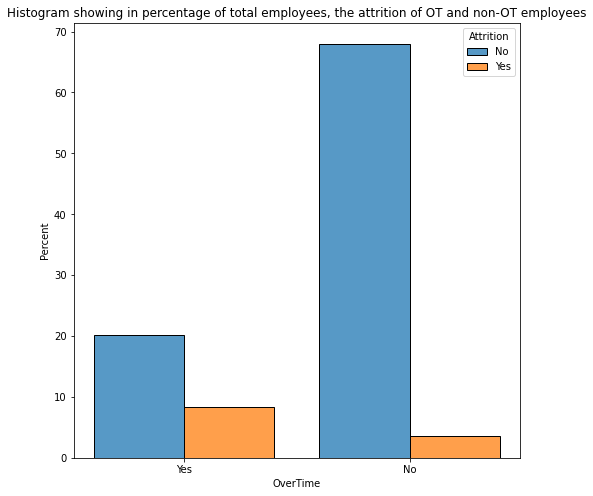

In [16]:
plt.figure(figsize=(8,8))
plt.title('Histogram showing in percentage of total employees, the attrition of OT and non-OT employees')
sns.histplot(data= wcomp_df, x= 'OverTime' , hue = 'Attrition', multiple = 'dodge'
             , stat = 'percent', shrink=0.8)

In [17]:
ot_tot = (wcomp_df['OverTime'] == 'Yes').sum() #total amount of employees who do overtime
ot_y = ((wcomp_df['OverTime'] == 'Yes') & (wcomp_df['Attrition'] == 'Yes')).sum() #total of those with attrition
print('Percentage of overtime employee attrition\n', round((ot_y/ot_tot*100), 3))

not_tot = (wcomp_df['OverTime'] == 'No').sum() #total amount of employees who don't do overtime
not_y = ((wcomp_df['OverTime'] == 'No') & (wcomp_df['Attrition'] == 'Yes')).sum() #total of those with attrition
print('\nPercentage of non-overtime employee attrition\n', round((not_y/not_tot*100), 3))

Percentage of overtime employee attrition
 29.202

Percentage of non-overtime employee attrition
 5.0


- **We see that there is a significantly higher percentage (29% against 5%) of OverTime employees leave the company.**

<AxesSubplot:xlabel='OverTime', ylabel='MonthlyIncome'>

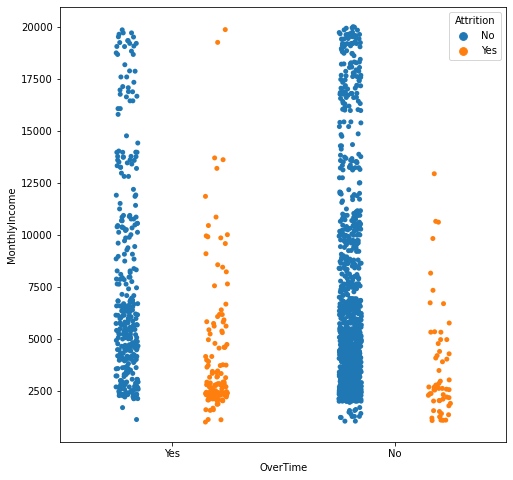

In [18]:
plt.figure(figsize=(8,8))
sns.stripplot(data = wcomp_df, x = 'OverTime', y = 'MonthlyIncome', hue = 'Attrition', dodge = True)

- **A further look at the OverTime employees show that lower MonthIncome also correlates with higher attrition**

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

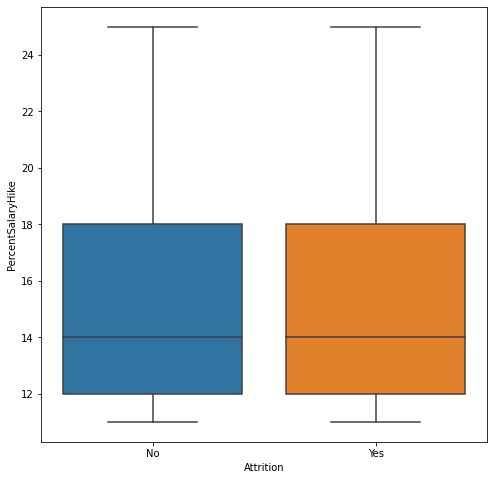

In [19]:
#sns.jointplot(data = wcomp_df, x = 'PercentSalaryHike', y = 'MonthlyIncome', hue = 'Attrition')
plt.figure(figsize=(8,8))
sns.boxplot(data = wcomp_df, x = 'Attrition', y = 'PercentSalaryHike')

- **We see that salary hikes have little impact on lowering the attrition of OverTime employees.**

<AxesSubplot:xlabel='Shift', ylabel='Age'>

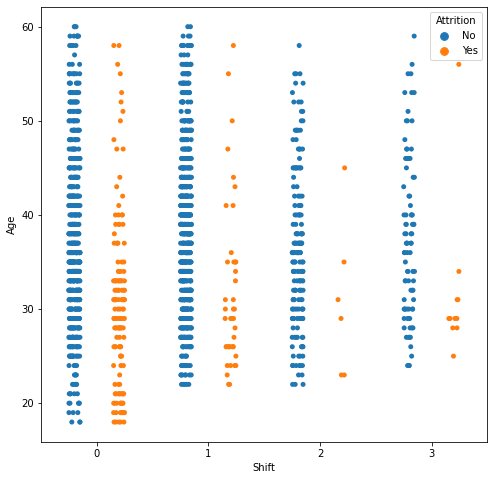

In [20]:
plt.figure(figsize=(8,8))
sns.stripplot(data = wcomp_df, x = 'Shift', y = 'Age', hue = 'Attrition', dodge = True)

- **Mean for shifts is 0.8. Most employees either have 1 or no shift work, there is little effect of shifts on attrition.**

# Conclusions of EDA:
Factors that show a positive correlation with attrition:
1. Marital Status - single
2. Age - 35 and below
3. DistanceFromHome - for Married and Divorced employees
4. Ratings below average (2.5 and below) for
- JobInvolvement
- EnvironmentSatisfaction
- JobSatisfaction
5. OverTime employees
6. OverTime employees with monthly income up till 7500

Salary Hikes may not be a useful way to prevent attrition in employees.

#  **Part 2 Predictive Analysis**

In this section, we will use the significant factors to fit a decision tree model in predicting employee attrition.


# 1. Choosing the columns and splitting the data

There are two categorical data, hence we will use get_dummies to replace the categories.

In [21]:
sig_factors = ['OverTime','Age','DistanceFromHome','MaritalStatus', 'MonthlyIncome', 
               'JobInvolvement','EnvironmentSatisfaction','JobSatisfaction',]

test_df = main_df[sig_factors]
one_hot_data = pd.get_dummies(test_df, columns =['OverTime'], drop_first = True) 
#this will remove colinearity

one_hot_data = pd.get_dummies(one_hot_data, columns =['MaritalStatus']) 
#there are three categories here so will not drop any columns from the dummies

target = main_df['Attrition']

one_hot_data.head()

,Age,DistanceFromHome,MonthlyIncome,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeID,,,,,,,,,,
1313919,41,1,5993,3,2,4,1,0,0,1
1200302,49,8,5130,2,3,2,0,0,1,0
1060315,37,2,2090,2,4,3,1,0,0,1
1272912,33,3,2909,3,4,3,1,0,1,0
1414939,27,2,3468,3,1,2,0,0,1,0


# **2. Splitting the data for training and testing.**
We will use a training size of 80%. We will try a few max_depths to find the best model accuracy and precision.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = one_hot_data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, train_size = 0.8)

depths = [3,4,6,8,10,12,20]

for d in depths:
    model = DecisionTreeClassifier(max_depth = d, random_state = 1)
    model.fit(X_train, y_train)
    print('Max depth of tree is', model.tree_.max_depth)

    y_predict = model.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    print('Model accuracy: {0:0.4f}'.format(score))
    
    cm = confusion_matrix(y_test, y_predict)
    TP = cm[1][1]
    FP = cm[0][1]
    ps = TP/(TP+FP)
    print('Precision score:{0:0.4f}'.format(ps))
    print('Confusion matrix:\n', cm)
    print()

Max depth of tree is 3
Model accuracy: 0.9107
Precision score:0.6818
Confusion matrix:
 [[291   7]
 [ 23  15]]

Max depth of tree is 4
Model accuracy: 0.9077
Precision score:0.6296
Confusion matrix:
 [[288  10]
 [ 21  17]]

Max depth of tree is 6
Model accuracy: 0.8958
Precision score:0.5405
Confusion matrix:
 [[281  17]
 [ 18  20]]

Max depth of tree is 8
Model accuracy: 0.8869
Precision score:0.5000
Confusion matrix:
 [[279  19]
 [ 19  19]]

Max depth of tree is 10
Model accuracy: 0.8750
Precision score:0.4545
Confusion matrix:
 [[274  24]
 [ 18  20]]

Max depth of tree is 12
Model accuracy: 0.8631
Precision score:0.4000
Confusion matrix:
 [[274  24]
 [ 22  16]]

Max depth of tree is 14
Model accuracy: 0.8750
Precision score:0.4583
Confusion matrix:
 [[272  26]
 [ 16  22]]



# **Model Finalisation**
**The algorithm favours a max depth of 14, however we see the highest accuracy and precision at max_depth of just 3.**
**We will go ahead with 3.**

In [23]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 1)
model.fit(X_train, y_train)
print('Max depth of tree is', model.tree_.max_depth)

y_predict = model.predict(X_test)
score = accuracy_score(y_test, y_predict)
print('Model accuracy: {0:0.4f}'.format(score))
cm = confusion_matrix(y_test, y_predict)
TP = cm[1][1]
FP = cm[0][1]
ps = TP/(TP+FP)
print('Precision score:{0:0.4f}'.format(ps))
print('Confusion matrix:\n', cm)

Max depth of tree is 3
Model accuracy: 0.9107
Precision score:0.6818
Confusion matrix:
 [[291   7]
 [ 23  15]]


**We'll save the tree for visualization on the model workings.**

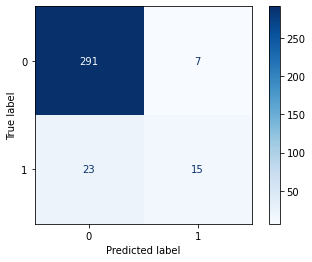

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_score
cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = "Blues")
plt.show()

#To learn how to calculate precision_score - not sure about how to get y_true yet
#y_true = ????
#p_score = precision_score(y_true, y_pred)
#print('Precision score: {0:0.4f}'.format(p_score))


In [27]:
import graphviz 

dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree")

'import graphviz \n\ndot_data = tree.export_graphviz(model, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("tree") '